# WHY DO WE CARE SO MUCH ABOUT NORAMLITY ?

---

Most of the paramteric machine learning models like LDA, Linear Regression and amy more assume that the data is normally distributed. If this assumption fails the model fails to give accurate predictions.

# WHAT IS NORMAL DISTRIBUTION ?

A probability distribution with the mean 0 and standard deviation of 1 is known as standard normal distribution or Gaussian distribution. A normal distibution is **symmetric** about the mean and follows a **bell shaped curve** . And almost 99.7% of the values lies within 3 standard deviation. The mean, median and mode of a normal distribution are equal.

---



# SKEWNESS

## What is skewness?

Skewness of a distribution is defined as the lack of symmetry. In a symmetrical distribution, the Mean, Meadian and Mode are equal.The normal distribution has a skewness of 0.


Skewness tell us about distribution of our data.


<a href="https://imgur.com/6SH4wau.png"><img src="https://imgur.com/6SH4wau.png" title="source: imgur.com" /></a>



# Skewness is of two types:



* **Positive skewness:** When the tail on the right side of the distribution is longer or fatter, we say the data is positively skewed. For a positive skewness mean > median > mode.

* **Negative skewness::** When the tail on the left side of the distribution is longer or fatter, we say that the distribution is negatively skewed. For a negative skewness mean < median < mode.

---


---

# What does skewness tells us?

To understand this better consider a example.

Consider house prices ranging from 100k to 1,000,000 with the average being 500,000.

If the peak of the distribution is in left side that means our data is positively skewed and most of the houses are being sold at the price less than the average.

If the peak of the distribution is in right side that means our data is negatively skewed and most of the houses are being sold at the price greater than the average.

Now, the question is when we can say our data is mderately skewed or heavily skewed?
  
  The thumb rule is:
  If the skewness is between -0.5 to +0.5 then we can say data is fairly symmetrical.
  If the skewness is between -1 to -0.5 or 0.5 to 1 then data is moderately skewed.
  And if the skewness is less than -1 and greater than +1 then our data is heavily skewed.


---



---



# KURTOSIS

You might have heard that kurtosis tells us about the shape or peakedness or flatness of the distribution but this is not correct. Kurtosis tell us about the tails behaviour. It is actually the measure of outliers present in the distribution. 

<a href="https://imgur.com/7FuwfAK.png"><img src="https://imgur.com/7FuwfAK.png" title="source: imgur.com" /></a>





# Kurtosis are of three types:


* **Mesokurtic:** When the tails of the distibution is similar to the normal distribution then it is mesokurtic. The kutosis for normal distibution is 3.

* **Leptokurtic:** If the kurtosis is greater than 3 then it is leptokurtic. In this case, the tails will be heaviour than the normal distribution which means lots of outliers are present in the data. It can be recognized as thin bell shaped distribution with peak higher than normal distribution.

* **Platykurtic:** Kurtosis will be less than 3 which implies thinner tail or lack of outliers than normal distribution.In case of platykurtic, bell shaped distribution will be broader and peak will be lower than the mesokurtic.


---



---



# Tranformations to reduce skewness or kurtosis



Let's take an example to handle the skewness and kutosis in a dataset. For this, I have used the 'House Pricing' data.

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from scipy.stats import skew, skewtest, norm
import scipy.stats as st
from scipy.stats import kurtosis
from scipy.stats import boxcox

In [2]:
#read data
df= pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Let's check the distribution of the "SalePrice"

In [3]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Here we can see that Mean (180921) is greater than the median(163000) and the maximum is 3.5 times the 75%. (The distribution is positvely skewed).
* We can say that most of the house prices are below the average.

### Let's plot and check

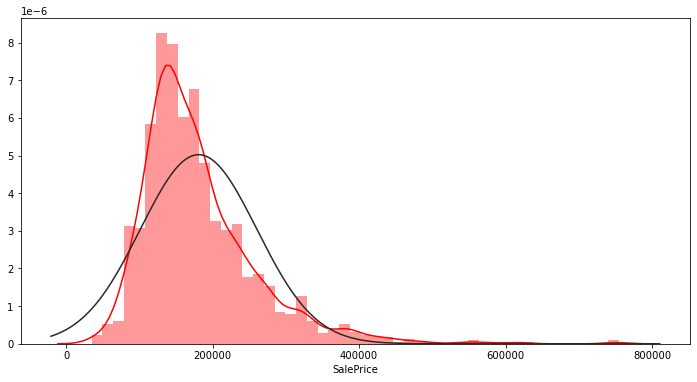

In [4]:
#Plot and check the distribution 
plt.figure(figsize=(12,6))
sns.distplot(df['SalePrice'],fit=norm, color ="r")
plt.show()

The histogram confirm that our dataset is positively skewed.

### Now let's check the measure of skewness and kurtosis

In [5]:
print("Skew of raw data: %f" % df['SalePrice'].skew()) #check skewness
print("Kurtosis of raw data: %f" % kurtosis(df['SalePrice'],fisher = False)) #check kurtosis

Skew of raw data: 1.882876
Kurtosis of raw data: 9.509812


Here, skew of raw data is positive and greater than 1,and kurtosis is greater than 3, right tail of the data is skewed. So, our data in this case is positively skewed and lyptokurtic.

Note- If we are keeping 'fisher=True', then kurtosis of normal distibution will be 0. Similarly, kurtosis >0 will be leptokurtic and kurtosis < 0 will be platykurtic

# Common transformation method to handle skewed data are

* log transformations
* square root transformation 
* Cube root transformation
* Box-cox transformation


# Let's look at the effect of all these transformation on our dataset.

## 1. Log Transformation

Logarithm is defined only for positive values so we can't apply log transformation on 0 and negative numbers.

Logarithm is defined only for positive values so we can't apply log transformation on 0 and negative numbers.

Logarithmic transformation is a convenient means of transforming a highly skewed variable into a more normalized dataset. When modeling variables with non-linear relationships, the chances of producing errors may also be skewed negatively.Using the logarithm of one or more variables improves the fit of the model by transforming the distribution of the features to a more normally-shaped bell curve.

Why log?

The normal distribution is widely used in basic research studies to model continuous outcomes. Unfortunately, the symmetric bell-shaped distribution often does not adequately describe the observed data from research projects. Quite often data arising in real studies are so skewed that standard statistical analyses of these data yield invalid results.

Many methods have been developed to test the normality assumption of observed data. When the distribution of the continuous data is non-normal, transformations of data are applied to make the data as "normal" as possible and, thus, increase the validity of the associated statistical analyses.

Popular use of the log transformation is to reduce the variability of data, especially in data sets that include outlying observations. Again, contrary to this popular belief, log transformation can often increase – not reduce – the variability of data whether or not there are outliers.

Why not?

Using transformations in general and log transformation in particular can be quite problematic. If such an approach is used, the researcher must be mindful about its limitations, particularly when interpreting the relevance of the analysis of transformed data for the hypothesis of interest about the original data.

Skew after Log Transformation: 0.121335
Kurtosis after Log Transformation: 3.802656


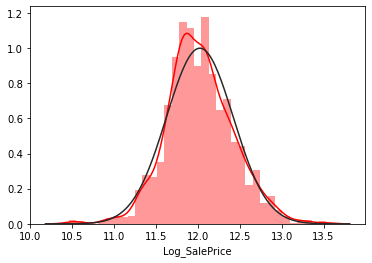

In [6]:
#log transformation
df['Log_SalePrice'] = np.log(df['SalePrice']) 

#check distribution,skewness and kurtosis
sns.distplot(df['Log_SalePrice'], fit=norm,color ="r")
print("Skew after Log Transformation: %f" % df['Log_SalePrice'].skew())
print("Kurtosis after Log Transformation: %f" % kurtosis(df['Log_SalePrice'],fisher = False))


Now if you look the distribution it is close to normal distribution. We have also reduced the skewness and the kurtosis.

Let's apply a linear regression model and check how well model performs before and after we apply log transformation.

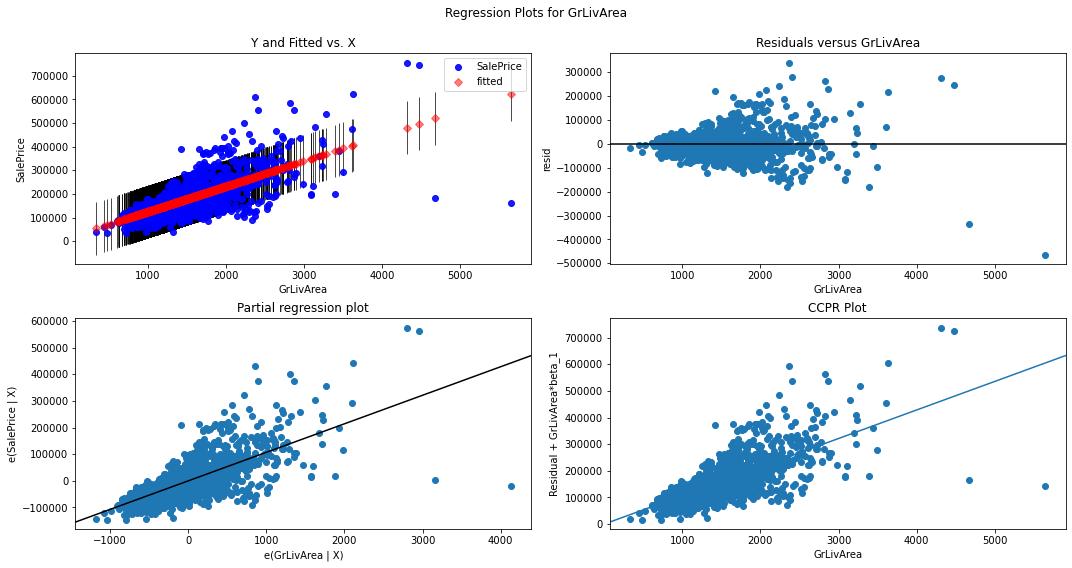

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

f = 'SalePrice~GrLivArea'
model = ols(formula=f, data=df).fit()

fig = plt.figure(figsize =(15,8))
fig = sm.graphics.plot_regress_exog(model, 'GrLivArea', fig=fig)

We can notice that it has a cone shape where the data points essentially scatter off as we increase in GrLivArea.

### Check model summary

In [8]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Thu, 07 Jan 2021   Prob (F-statistic):          4.52e-223
Time:                        23:36:33   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.857e+04   4480.755      4.144      0.0

### Apply Log on GrLivArea

In [9]:
#log transformation on GrLivArea

df['Log_GrLivArea'] = np.log(df['GrLivArea'])

### Apply Linear Regression on Log transformed SalePrice and GrLivArea

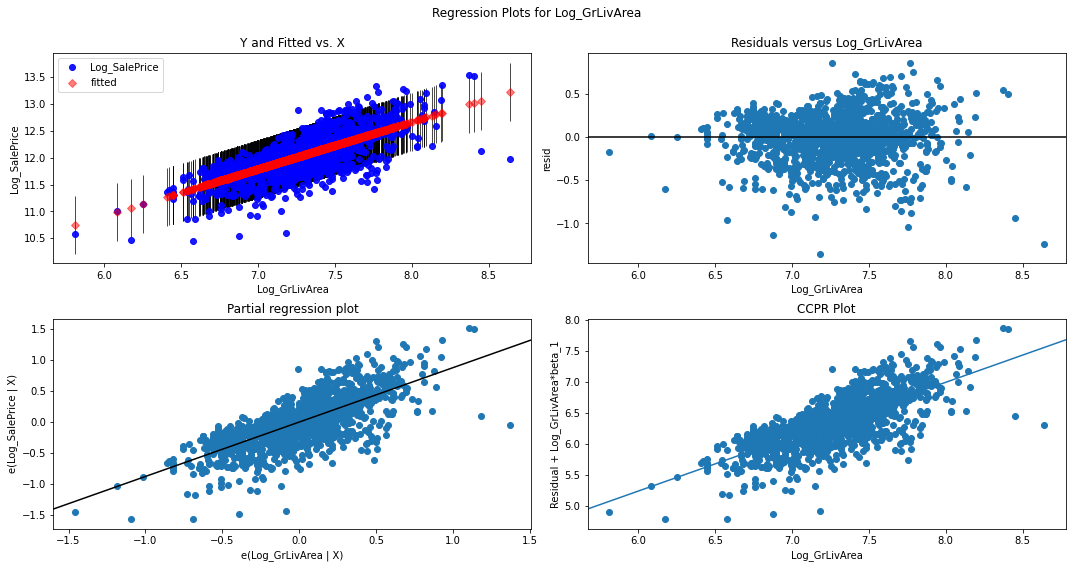

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

f = 'Log_SalePrice~Log_GrLivArea'
model = ols(formula=f, data=df).fit()

fig = plt.figure(figsize =(15,8))
fig = sm.graphics.plot_regress_exog(model, 'Log_GrLivArea', fig=fig)

We can now see the relationship as a percent change. By applying the logarithm to the variables, there is a much more distinguished and or adjusted linear regression line through the base of the data points, resulting in a better prediction model.

In [11]:
#check the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Log_SalePrice   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     1666.
Date:                Thu, 07 Jan 2021   Prob (F-statistic):          1.60e-243
Time:                        23:36:36   Log-Likelihood:                -175.10
No. Observations:                1460   AIC:                             354.2
Df Residuals:                    1458   BIC:                             364.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.6681      0.156     36.360

After Applying Log transformation R-squared has increased from 0.50 to 0.53.

# 2. Square Root Transformation

The square root means x to x^(1/2) = sqrt(x), is a transformation with a moderate effect on distribution shape. it is weaker than the logarithm and the cube root.

It is also used for reducing right skewness, and also has the advantage that it can be applied to zero values.

Note that the square root of an area has the units of a length. It is commonly applied to counted data, especially if the values are mostly rather small.

Skew after sqrt Transformation: 0.943153
Kurtosis after sqrt Transformation: 4.946999


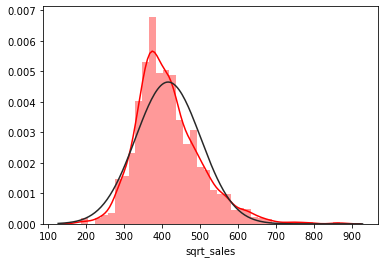

In [12]:
# Square Root Transformation
df['sqrt_sales'] = np.sqrt(df['SalePrice']) 

#check distribution,skewness and kurtosis
sns.distplot(df['sqrt_sales'], fit=norm,color ="r")
print("Skew after sqrt Transformation: %f" % df['sqrt_sales'].skew())
print("Kurtosis after sqrt Transformation: %f" % kurtosis(df['sqrt_sales'],fisher = False))

Note: The square root tranformation has reduced the skewed values from 1.88 to 0.943 which is very much nearer to zero compare to 1.88

# 3. Cube root Transformation


The cube root means x to x^(1/3). This is a fairly strong transformation with a substantial effect on distribution shape,

It is weaker than the logarithm but stronger than the square root transformation.

It is also used for reducing right skewness, and has the advantage that it can be applied to zero and negative values. Note that the cube root of a volume has the units of a length. It is commonly applied to rainfall data.

Skew after cbrt Transformation: 0.666768
Kurtosis after cbrt Transformation: 4.258971


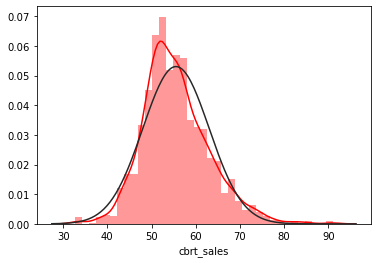

In [13]:
# Square Root Transformation
df['cbrt_sales'] = np.cbrt(df['SalePrice']) 

#check distribution,skewness and kurtosis
sns.distplot(df['cbrt_sales'], fit=norm,color ="r")
print("Skew after cbrt Transformation: %f" % df['cbrt_sales'].skew())
print("Kurtosis after cbrt Transformation: %f" % kurtosis(df['cbrt_sales'],fisher = False))

Note: In the square root tranformation it has reduced the skewed values from 1.88 to 0.943 but now in cube root transformation the skewed values reduced to 0.66. and it is very much near to zero compare to 0.943.

## Box-Cox Transformation

he Box-Cox transformation is a particulary useful family of transformations. It is defined as:

T(Y)=(Y^λ−1)/λ
where Y is the response variable and λ is the transformation parameter. For λ = 0, the natural log of the data is taken instead of using the above formula.

At the core of the Box Cox transformation is an exponent, lambda (λ), which varies from -5 to 5. All values of λ are considered and the optimal value for your data is selected; The “optimal value” is the one which results in the best approximation of a normal distribution curve.

Below is the list of different lanbda values we can consider while doing box-cox transformation.


Lambda= -2 --> Y'=1/Y2 

Lambda= -1 --> Y'=1/Y

Lambda= -0.5 --> Y'=1/SQRT(Y)

Lambda= 0 --> Y'=LOG(Y)

Lambda= 0.5 --> Y'=SQRT(Y)

Lambda= 1 --> Y'=Y

Lambda= 2 --> Y'=Y2

Box-cox transformation only works if all the data is positive and greater than 0. In case of negative data, we can add a constant value to make it positive before applying box-cox transformation.

Skew after box cox Transformation: 0.121210
kurt after box cox Transformation: 3.802656


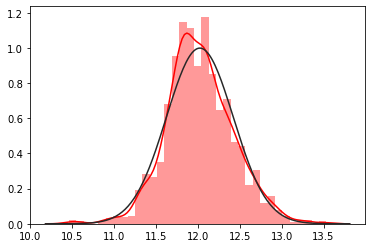

In [14]:
#Box-cox tranformation
Box_cox = st.boxcox(df['SalePrice'],lmbda=0)
sns.distplot(Box_cox,fit=norm, color ="r")
print("Skew after box cox Transformation: %f" % skew(Box_cox))
print("kurt after box cox Transformation: %f" % kurtosis(Box_cox,fisher = False))

Now if we look the SalePrice is close to normal distribution.